<a href="https://colab.research.google.com/github/juathanduarte/cncomp/blob/main/juathan_duarte_relatorio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relatório 2**
##Cálculo Numérico Computacional - T2

> **Nome:** Juathan Coelho Duarte

> **Matrícula:** 19200989

In [170]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg
from sympy import *
import time
x = Symbol('x')
values = []

#**Métodos**

###**Gráficos**

In [171]:
def showGraphic(f, a1_start, a1_end, a2_start, a2_end):
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    curva = np.linspace(a1_start, a1_end, 200)
    valores1 = [f(x) for x in curva]
    valores2 = [f(x) for x in curva]
    plt.plot(curva, valores1, linestyle="-")
    plt.plot(curva, valores2, linestyle="-")
    plt.axhline(y=0, color="blue")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()

    plt.subplot(1, 2, 2)
    curva = np.linspace(a2_start, a2_end, 200)
    valores1 = [f(x) for x in curva]
    valores2 = [f(x) for x in curva]
    plt.plot(curva, valores1, linestyle="-")
    plt.plot(curva, valores2, linestyle="-")
    plt.axhline(y=0, color="blue")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()

    plt.show()


###**Pivotação**

In [172]:
def pivotacao(j, matrizA, n, p):
    aMax = abs(matrizA[j][j])
    for k in range(j+1, n):     
        if(abs(matrizA[k][j]) > aMax):
            aMax = matrizA[k][j]
            p = k
  
    return aMax, p

###**Eliminação de Gauss**

In [173]:
def gaussiana(matrizA, b, n, pivot=True):
    det = 1
    info = 0
    for j in range(n):
        p = j
        aMax = abs(matrizA[j][j])
    
        if(pivot):
            aMax, p = pivotacao(j, matrizA, n, p)
        if p != j:
            for k in range(n):
                t = matrizA[j][k]
                matrizA[j][k] = matrizA[p][k]
                matrizA[p][k] = t
            t = b[j]
            b[j] = b[p]
            b[p] = t
            det  = (det * -1)
        det = det * matrizA[j][j]
        if abs(matrizA[j][j]) != 0:
            r = 1/matrizA[j][j]
            for i in range(j+1, n):
                mult = matrizA[i][j] * r
                matrizA[i][j] = 0
                for k in range(j+1, n):
                    matrizA[i][k] = matrizA[i][k] - (mult * matrizA[j][k])
                b[i] = b[i] - (mult * b[j])
        else:
            if info == 0:
                info = j
    det = det * matrizA[n-1][n-1]
    if(info == 0 and abs(matrizA[n-1][n-1])):
        info = n
    return matrizA, b, det, info


###**Fatoração LU**

In [174]:
def fatoraLU(A, b):  
    ordem = A.shape[0]

    L = np.identity(ordem)
    U = np.copy(A)

    PdU = 1
    info = 0

    for j in range (ordem):
        p = j
        PdU = PdU * U[j][j]

        if (abs(U[j][j]) != 0):
            r = 1 / U[j][j]
            for i in range (j+1, ordem):
                mult = U[i][j] * r
                L[i][j] = mult
                U[i][j] = 0
                for k in range (j+1, ordem):
                    U[i][k] = U[i][k] - mult * U[j][k]
                b[i] = b[i] - mult * b[j]
        else:
            print("Divisão por zero")
            if not info:
                info = j

    return L, U, b

###**Cholesky**

In [175]:
def cholesky(A):
    n = len(A)
    G = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            s = sum(G[i][k]*G[j][k] for k in range(j))
            if (i == j):
                G[i][j] = np.sqrt(A[i][i] - s)
            else:
                G[i][j] = (1.0 / G[j][j] * (A[i][j] - s))
    return G

def solve(A, b):
    G = cholesky(A)
    Gt = np.transpose(G)
    y = np.zeros(len(b))
    x = np.zeros(len(b))
    n = len(A)
    # Forward substitution: Ly = b
    for i in range(n):
        y[i] = b[i] - sum(G[i][j]*y[j] for j in range(i))
        y[i] /= G[i][i]
    # Backward substitution: Gt x = y
    for i in range(n-1, -1, -1):
        x[i] = y[i] - sum(Gt[i][j]*x[j] for j in range(i+1, n))
        x[i] /= Gt[i][i]
    return G, Gt, x

def pode_decompor(A):
  # verificando se a matriz é simétrica
  if np.allclose(A, A.T):
      # tentando fazer a decomposição de Cholesky
      try:
          L = np.linalg.cholesky(A)
          print("A matriz pode ser decomposta na fatoração de Cholesky.")
      except np.linalg.LinAlgError:
          print("A matriz não pode ser decomposta na fatoração de Cholesky.")
  else:
      print("A matriz não é simétrica e não pode ser decomposta na fatoração de Cholesky.")


###**Gauss Jacobi**

In [176]:
def gaussJacobi(A,b,precisao,N):      
    n=np.shape(A)[0]  
    x = np.zeros(n)  
    iter = 0
    x0=np.copy(A)[0]
    for z in np.arange(n):
        x0[z]=b[z]/A[z][z]
    print("Valor inicial x0 = " + str(x0))
    while (iter < N):  
        iter = iter+1   
        for i in np.arange(n):  
            x[i] = b[i]  
            for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):
                x[i] -= A[i,j]*x0[j]  
            x[i] /= A[i,i]    
        if ( (abs(max((x-x0).min(), (x-x0).max(), key=abs))/(abs(max(x.min(), x.max(), key=abs)) ) < precisao)): 
            print("Execução interrompida por precisão.")
            print("Total de iterações: " + str(iter))
            print("Resultado do método de Gauss-Jacobi:")
            print(x)
            return     
        x0 = np.copy(x)  
        print("-- Novo valor de x = " + str(x0))
    print("Execução interrompida por número de iterações.")
    print("Total de iterações: " + str(iter))
    print("Resultado do método de Gauss-Jacobi:")
    print(x)
    return

###**Gauss Seidel**

In [177]:
def gaussSeidel(A,b,precisao,N):    
    n=np.shape(A)[0]  
    x = np.zeros(n)
    iter = 0   
    x0=np.copy(A)[0]
    for z in np.arange(n):
        x0[z]=b[z]/A[z][z]
    print("Valor inicial x0 = " + str(x0)) 
    while (iter < N):  
        iter = iter+1    
        for i in np.arange(n):  
            x[i] = b[i]  
            for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):  
                x[i] -= A[i,j]*x[j]  
            x[i] /= A[i,i]  
        if ( (abs(max((x-x0).min(), (x-x0).max(), key=abs))/(abs(max(x.min(), x.max(), key=abs)) ) < precisao)): 
            print("Execução interrompida por precisão.")
            print("Total de iterações: " + str(iter))
            print("Resultado do método de Gauss-Seidel:")
            print(x)
            return 
        x0 = np.copy(x)
        print("-- Novo valor de x = " + str(x0))
    print("Execução interrompida por número de iterações.")
    print("Total de iterações: " + str(iter))
    print("Resultado do método de Gauss-Seidel:")
    print(x)
    return

###**Testes Gauss-Seidel & Jacobi**

In [178]:
def diagDominante(m) :
    n=np.shape(m)[0]
    for i in range(0, n) :        
        sum = 0
        for j in range(0, n) :
            sum = sum + abs(m[i][j])    
        sum = sum - abs(m[i][i])
        if (abs(m[i][i]) < sum) :
            print("A matriz não é diagonalmente dominante.")
            return
    print("A matriz é diagonalmente dominante.")
    return

def testeRaioEspectral(M):
  w,v=np.linalg.eig(M)
  for i in w:
    if(abs(i)>1.0):
      print("O raio espectral da matriz é maior que 1.")
      return
  print("O raio espectral da matriz é menor que 1.")
  return

#**Exercícios**

###**Exercício 1**

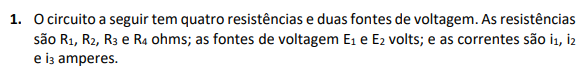

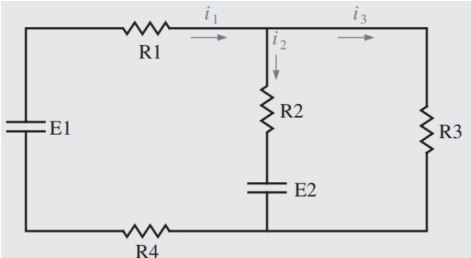

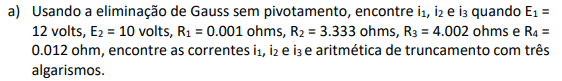

\begin{align}
R_2 * i_2 - R_4 * i_1 + R_1 * i_1 + E_2 - E_1 = 0\\
R_3 * i_3 - R_2 * i_2 - E_2 = 0\\
i_1 - i_2 - i_3 = 0
\end{align}

In [179]:
A = np.array([
    [1, -1, -1],
    [-0.011, 3.333, 0],
    [0, -3.333, 4.002]
], dtype=float)

b = np.array([2, 10, 0], dtype=float)

A, b, det, info = gaussiana(np.copy(A), np.copy(b), 3, False)

i1, i2, i3 = np.linalg.solve(A, b)

print(f"- Vetor: [ {i1}, {i2}, {i3} ]")
print(f"- Determinante: {round(det, 3)}")
print(f"- Info: {info}")
print(f"- Resultado final | Sem pivotamento: \n * i1 = {round(i1, 3)}\n * i2 = {round(i2, 3)}\n * i3 = {round(i3, 3)} ")

- Vetor: [ 7.544688139166892, 3.0251999908583365, 2.519488148308555 ]
- Determinante: 52.912
- Info: 3
- Resultado final | Sem pivotamento: 
 * i1 = 7.545
 * i2 = 3.025
 * i3 = 2.519 


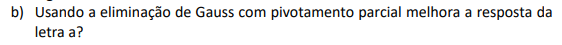

**Resposta:** *O método de Gauss sem pivotagem é um método mais simples e rápido computacionalmente falando quando comparado ao Gauss com pivotagem, porém, este método só funciona quando nenhum elemento da diagonal principal da matriz de coeficientes é nulo já que, durante a execução do algoritmo, é preciso dividir os elementos da linha da matriz pelo pivô resultando em uma divisão por zero. Ao comparar os resultados, o resultado proveniente do método de Gauss com pivotamento parcial é próximo ao valor sem pivotagem, resultado interessante, pois a princípio com pivotagem deveria ser mais eficiente.*

In [180]:
A = np.array([
    [1, -1, -1],
    [-0.011, 3.333, 0],
    [0, -3.333, 4.002]
], dtype=float)

b = np.array([2, 10, 0], dtype=float)

A, b, det, info = gaussiana(A, b, 3, True)

i1, i2, i3 = np.linalg.solve(A, b)

print(f"- Vetor: [ {i1}, {i2}, {i3} ]")
print(f"- Determinante: {round(det,3)}")
print(f"- Info: {info}")
print(f"- Resultado final | Com pivotamento parcial: \n * i1 = {round(i1, 3)}\n * i2 = {round(i2, 3)}\n * i3 = {round(i3, 3)} ")


- Vetor: [ 7.544688139166892, 3.0251999908583365, 2.519488148308555 ]
- Determinante: 52.737
- Info: 3
- Resultado final | Com pivotamento parcial: 
 * i1 = 7.545
 * i2 = 3.025
 * i3 = 2.519 


###**Exercício 2**

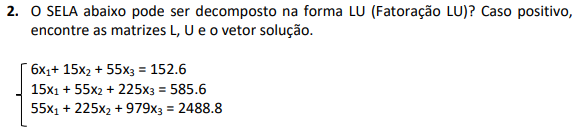

**Resposta:** *Para utilizar o método da fatoração LU é preciso que todos os determinantes das submatrizes da matriz de coeficientes não sejam nulos, como podemos verificar abaixo a matriz pode ser decomposta pois não existe determinante nulo.*

In [181]:
A_1 = np.array([[6]],dtype=float)
A_2 = np.array([[6,15],[15,55]],dtype=float)
A_3 = np.array([[6,15,55],[15,55,225],[55,225,979]],dtype=float)


print("Determinante - 1: " + str(np.linalg.det(A_1)))
print("Determinante - 2: " + str(np.linalg.det(A_2)))
print("Determinante - 3: " + str(np.linalg.det(A_3)))

Determinante - 1: 6.0
Determinante - 2: 104.99999999999997
Determinante - 3: 3920.0000000000136


In [182]:
A = np.array([
    [6, 15, 55],
    [15, 55, 225],
    [55, 225, 979]
], dtype=float)

b = np.array([152.6, 585.6, 2488.8], dtype=float)

L, U, x = fatoraLU(A, b)

print('- Matriz L: ')
print(L)
print('\n- Matriz U: ')
print(U)
print('\n- Vetor solução: ', x)

- Matriz L: 
[[1.         0.         0.        ]
 [2.5        1.         0.        ]
 [9.16666667 5.         1.        ]]

- Matriz U: 
[[ 6.         15.         55.        ]
 [ 0.         17.5        87.5       ]
 [ 0.          0.         37.33333333]]

- Vetor solução:  [152.6        204.1         69.46666667]


###**Exercício 3**

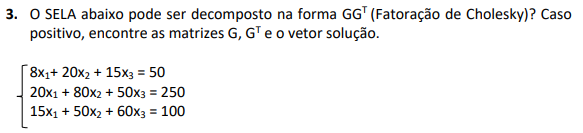

**Resposta:** *Para verificar se uma matriz pode ser decomposta pelo método de Cholesky, é necessário que ela seja simétrica e positiva definida. Implementei um método que recebe como parâmetro a matriz A e retorna um valor booleano indicando se a matriz pode ou não serdecomposta pelo método de Cholesky.*

In [183]:
A = A = np.array([
    [8, 20, 15],
    [20, 80, 50],
    [15, 50, 60]
], dtype=float)

b = np.array([
    50, 250, 100
], dtype=float)

pode_decompor(A)

A matriz pode ser decomposta na fatoração de Cholesky.


In [184]:
G, GT, x = solve(A, b)
print("- Matriz G: ")
print(G)
print("\n- Matriz GT: ")
print(GT)
print("\n- Vetor solução: ", x)

- Matriz G: 
[[2.82842712 0.         0.        ]
 [7.07106781 5.47722558 0.        ]
 [5.30330086 2.28217732 5.16397779]]

- Matriz GT: 
[[2.82842712 7.07106781 5.30330086]
 [0.         5.47722558 2.28217732]
 [0.         0.         5.16397779]]

- Vetor solução:  [-2.734375   4.8828125 -1.71875  ]


###**Exercício 4**

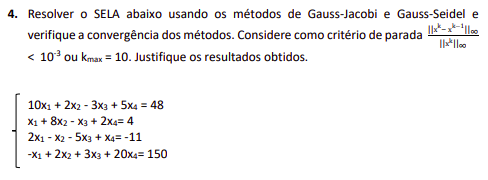

In [185]:
A = np.array([
    [10, 2, -3, 5],
    [1, 8, -1, 2],
    [2, -1, -5, 1],
    [-1, 2, 3, 20]
], dtype=float)

b = np.array([48, 4, -11, 150], dtype=float)

gaussJacobi(np.copy(A), np.copy(b), 10**-3, 10)

Valor inicial x0 = [4.8 0.5 2.2 7.5]
-- Novo valor de x = [ 1.61 -1.7   5.52  7.36]
-- Novo valor de x = [ 3.116   -0.85125  4.656    6.9225 ]
-- Novo valor de x = [ 2.9058   -1.038125  5.00115   7.042525]
-- Novo valor de x = [ 2.9867075 -0.9987125  4.97845    6.99893  ]
-- Novo valor de x = [ 2.9938125  -1.00076469  4.9942115   7.00243912]
Execução interrompida por precisão.
Total de iterações: 6
Resultado do método de Gauss-Jacobi:
[ 2.99719682 -1.00055991  4.99816576  7.00063537]


In [186]:
A = np.array([
    [10, 2, -3, 5],
    [1, 8, -1, 2],
    [2, -1, -5, 1],
    [-1, 2, 3, 20]
], dtype=float)

b = np.array([48, 4, -11, 150], dtype=float)

gaussSeidel(np.copy(A), np.copy(b), 10**-3, 10)

Valor inicial x0 = [4.8 0.5 2.2 7.5]
-- Novo valor de x = [ 4.8   -0.1    4.14   7.129]
-- Novo valor de x = [ 2.4975     -1.0769375   4.8401875   7.00654062]
-- Novo valor de x = [ 2.96417344 -1.0171334   4.99040418  7.00136138]
-- Novo valor de x = [ 2.99986724 -1.00152323  5.00052382  7.00006711]
Execução interrompida por precisão.
Total de iterações: 5
Resultado do método de Gauss-Seidel:
[ 3.00042824 -1.00000483  5.00018568  6.99999404]


*Para garantir que os métodos convirjam para o valor exato do sistema, seu raio espectral deve ser menor que 1 e/ou a matriz precisa ser diagonalmente dominante. Fiz um método que testa as duas condições.*

In [187]:
testeRaioEspectral(A)
diagDominante(A)

O raio espectral da matriz é maior que 1.
A matriz é diagonalmente dominante.


**Resposta:** *Ao comparar os resultados obtidos pelos dois métodos, podemos notar que o método Gauss-Seidel converge mais rápido que o Gauss-Jacobi, tal acontecimento é proveniente da atualização dos valores de x durante a execução do método de Gauss-Seidel.*

###**Exercício 5**

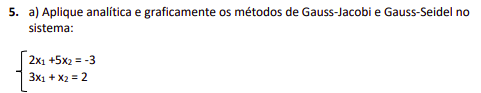

Gauss-Jacobi

Valor inicial x0 = [-1.5  2. ]
-- Novo valor de x = [-6.5  6.5]
-- Novo valor de x = [-17.75  21.5 ]
-- Novo valor de x = [-55.25  55.25]
-- Novo valor de x = [-139.625  167.75 ]
-- Novo valor de x = [-420.875  420.875]
-- Novo valor de x = [-1053.6875  1264.625 ]
-- Novo valor de x = [-3163.0625  3163.0625]
-- Novo valor de x = [-7909.15625  9491.1875 ]
-- Novo valor de x = [-23729.46875  23729.46875]
-- Novo valor de x = [-59325.171875  71190.40625 ]
Execução interrompida por número de iterações.
Total de iterações: 10
Resultado do método de Gauss-Jacobi:
[-59325.171875  71190.40625 ]

Gauss-Seidel

Valor inicial x0 = [-1.5  2. ]
-- Novo valor de x = [-1.5  6.5]
-- Novo valor de x = [-17.75  55.25]
-- Novo valor de x = [-139.625  420.875]
-- Novo valor de x = [-1053.6875  3163.0625]
-- Novo valor de x = [-7909.15625 23729.46875]
-- Novo valor de x = [-59325.171875 177977.515625]
-- Novo valor de x = [-444945.2890625 1334837.8671875]
-- Novo valor de x = [-3337096.167968

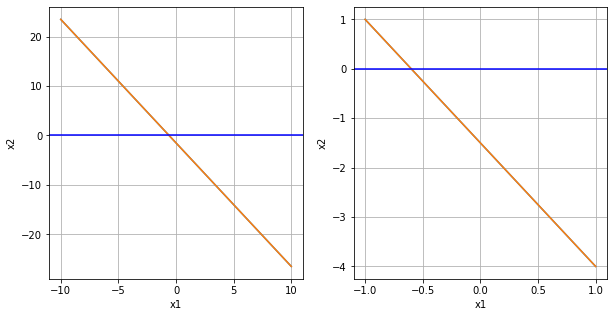

In [188]:
A = np.array([
    [2, 5],
    [3, 1]
], dtype=float)

b = np.array([-3, 2], dtype=float)

funcaoA_1 = lambda x : (-5 * x - 3) / 2
funcaoA_2 = lambda x : (2 - x) / 3

print('Gauss-Jacobi\n')
gaussJacobi(np.copy(A), np.copy(b), 10**-3, 10)

print('\nGauss-Seidel\n')
gaussSeidel(np.copy(A), np.copy(b), 10**-3, 10)

showGraphic(funcaoA_1, -10, 10, -1, 1)



In [189]:
testeRaioEspectral(A)
diagDominante(A)

O raio espectral da matriz é maior que 1.
A matriz não é diagonalmente dominante.


image.png

In [190]:
A_01 = np.array([
    [3, 1],
    [2, 5]
], dtype=float)

funcaoA_1 = lambda x : (-5 * x - 3) / 2
funcaoA_2 = lambda x : (2 - x) / 3

print('Gauss-Jacobi\n')
gaussJacobi(np.copy(A_01), np.copy(b), 10**-3, 10)

print('\nGauss-Seidel\n')
gaussSeidel(np.copy(A_01), np.copy(b), 10**-3, 10)

Gauss-Jacobi

Valor inicial x0 = [-1.   0.4]
-- Novo valor de x = [-1.13333333  0.8       ]
-- Novo valor de x = [-1.26666667  0.85333333]
-- Novo valor de x = [-1.28444444  0.90666667]
-- Novo valor de x = [-1.30222222  0.91377778]
-- Novo valor de x = [-1.30459259  0.92088889]
-- Novo valor de x = [-1.30696296  0.92183704]
Execução interrompida por precisão.
Total de iterações: 7
Resultado do método de Gauss-Jacobi:
[-1.30727901  0.92278519]

Gauss-Seidel

Valor inicial x0 = [-1.   0.4]
-- Novo valor de x = [-1.   0.8]
-- Novo valor de x = [-1.26666667  0.90666667]
-- Novo valor de x = [-1.30222222  0.92088889]
-- Novo valor de x = [-1.30696296  0.92278519]
Execução interrompida por precisão.
Total de iterações: 5
Resultado do método de Gauss-Seidel:
[-1.30759506  0.92303802]


In [191]:
testeRaioEspectral(A_01)
diagDominante(A_01)

O raio espectral da matriz é maior que 1.
A matriz é diagonalmente dominante.


image.png

**Resposta:** *A principal diferença entre os dois métodos é como eles atualizam as variáveis em cada iteração. O método Jacobi atualiza todas as variáveis ao mesmo tempo usando os valores da iteração anterior, enquanto o método de Gauss-Seidel atualiza as variáveis conforme elas são calculadas, usando valores mais recentes para as variáveis já atualizadas. Essa diferença pode fazer (e fez!) com que o método de Gauss-Seidel seja mais rápido do que o método de Jacobi. Reordenar as equações no sistema de equações lineares, pode levar a uma matriz mais bem condicionada para o método de Gauss-Seidel do que para o método Jacobi, isso ocorre pois a matriz resultante da permutação pode ter (e teve!) uma diagonal dominante mais forte, o que significa que os elementos diagonais são maiores do que os outros elementos na mesma linha ou coluna, ou seja, quando uma matriz tem uma diagonal dominante forte, o método de Gauss-Seidel geralmente converge mais rapidamente do que o método de Jacobi.
Resumindo, a permutação das equações fez com que o método de Gauss-Seidel fosse mais rápido que o método de Jacobi, levando em conta o que expliquei acima.*